### 회귀 모델

In [2]:
import numpy as np
import pandas as pd

# boston집값 데이터셋
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [5]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
# datasets을 dataframe에 불러온다
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
# 실제 집값 데이터
data['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
df['MEDV'] = data['target']

In [10]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

###  데이터셋을 분할

In [21]:
from sklearn.model_selection import train_test_split

In [26]:
# test_size의 기본값은 0.25
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV',1), df['MEDV'],  test_size=0.2, random_state=123)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [28]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
441,9.72418,0.0,18.10,0.0,0.7400,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
172,0.13914,0.0,4.05,0.0,0.5100,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
95,0.12204,0.0,2.89,0.0,0.4450,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65
54,0.01360,75.0,4.00,0.0,0.4100,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80


In [31]:
x_train = x_train.reset_index(drop=True)
x_test  = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

In [35]:
y_train.head()

0    48.5
1    17.1
2    23.1
3    28.4
4    18.9
Name: MEDV, dtype: float64

###  평가지표

선형회귀에서 자주 사용하는 평가지표
1. MSE(Mean Sqared Error)  <br>

   예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값
    <br><br>

    ${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

    <br><br>
2. MAE(Mean Absolute Error) <br>
   예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값
   <br><br>
   $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$
  
  <br><br>
3.RMSE(Root Mean Squared Error)<br>
  예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 뒤 루트를 씌운 값
  <br><br>
    $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

### 평가 지표를 사용해보기

In [36]:
#  사용 예
pred = np.array([3,4,5])
target = np.array([2,3,4])

In [37]:
def cal_MSE(pred, target):
    return  ((pred-target)**2).mean()

cal_MSE(pred,target)

1.0

In [38]:
def cal_MAE(pred, target):
    return np.abs(pred-target).mean()

cal_MAE(pred,target)

1.0

In [39]:
def cal_RMSE(pred, target):
    return  np.sqrt((pred-target)**2).mean()

cal_RMSE(pred,target)

1.0

In [41]:
# scikit-learn에서 제공하는 평가지표 메소드
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
cal_MSE(pred,target), mean_squared_error(pred,target)

(1.0, 1.0)

In [43]:
cal_MAE(pred,target), mean_absolute_error(pred,target)

(1.0, 1.0)

In [46]:
# squared=False을 주면 RMSE로 사용할 수 있다.
# squaredbool, default=True
# If True returns MSE value, if False returns RMSE value.
# 참조 : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
cal_RMSE(pred,target), mean_squared_error(pred, target, squared=False)

(1.0, 1.0)

### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# model정의
# n_jobs=-1이면 CPU를 모두 사용
model = LinearRegression(n_jobs=-1)

In [50]:
# 모델 학습
model.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [54]:
pred = model.predict(x_test)

In [58]:
pred.shape, y_test.shape

((102,), (102,))

In [59]:
mean_squared_error(pred,y_test)

28.192485758469683

### 모델 성능 확인 (그래프)

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
my_predictions = {}

In [82]:
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

In [84]:
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

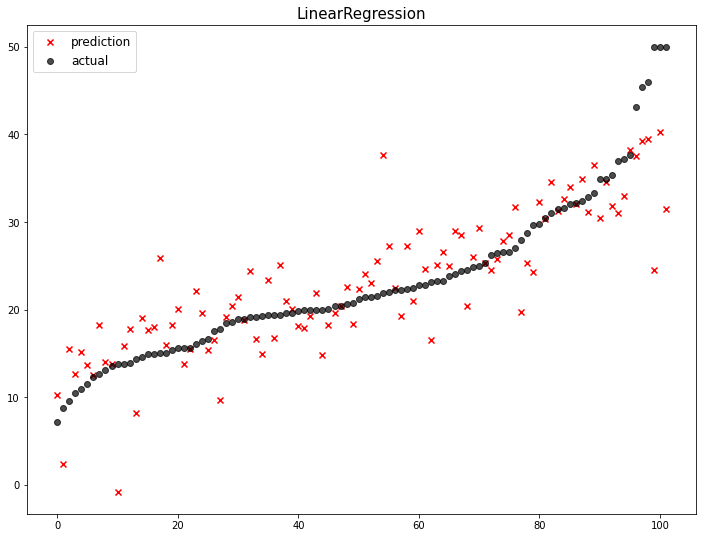

              model        mse
0  LinearRegression  28.192486


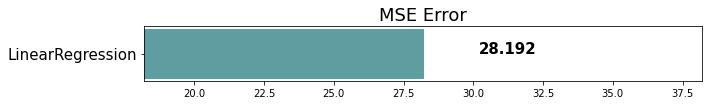

In [85]:
mse_eval('LinearRegression', pred, y_test)

### 규제를 추가(Regularization)

학습이 과대적합(Overfitting)되는 것을 방지하고자 penalty를 부여  
L1 Regularization - 라쏘(Lasso) 규제  α값을 어떻게 설정하느냐<br><br>
$Error=MSE+α|w|$ <br><br>


L2 Regularization - 릿지(Ridge) 규제 α값을 어떻게 설정하느냐<br><br>
$Error=MSE+αw^2$ <br><br>

In [87]:
from sklearn.linear_model import Ridge

In [88]:
#값이 커질수록 큰 규제
alphas = [100, 10, 1, 0.1, 0.01, 0.001]

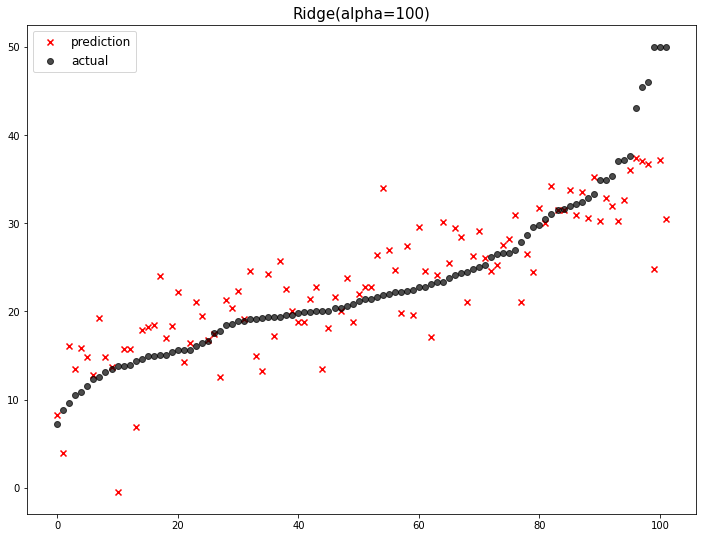

              model        mse
0  Ridge(alpha=100)  29.201438
1  LinearRegression  28.192486


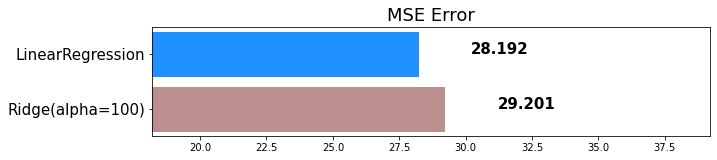

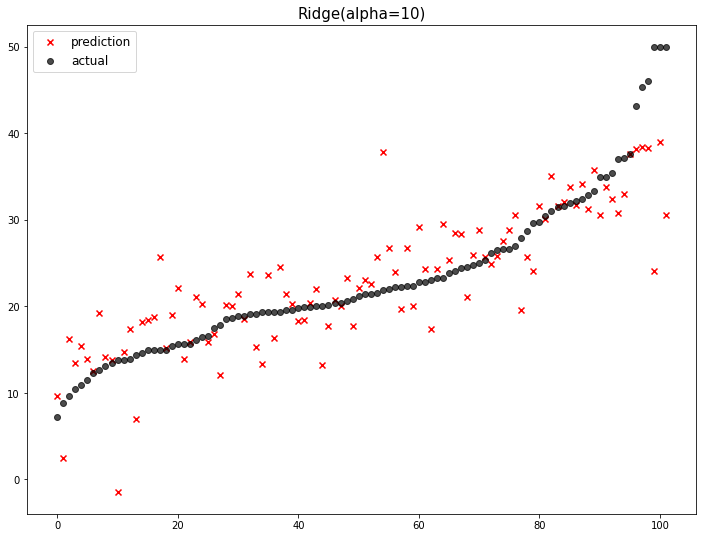

              model        mse
0   Ridge(alpha=10)  29.799160
1  Ridge(alpha=100)  29.201438
2  LinearRegression  28.192486


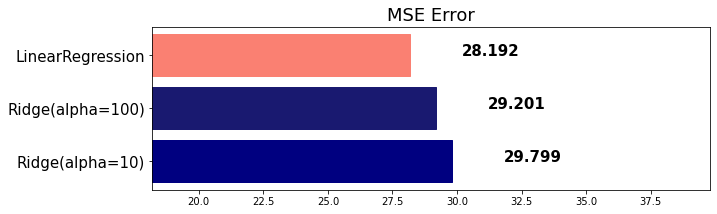

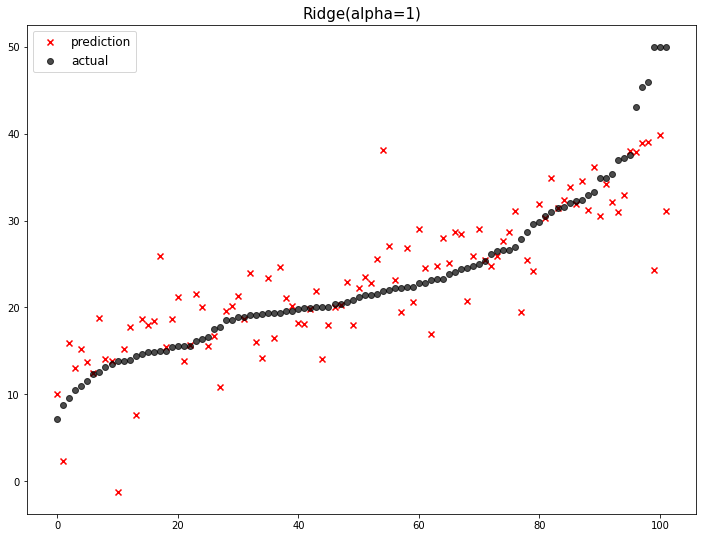

              model        mse
0   Ridge(alpha=10)  29.799160
1  Ridge(alpha=100)  29.201438
2    Ridge(alpha=1)  28.932170
3  LinearRegression  28.192486


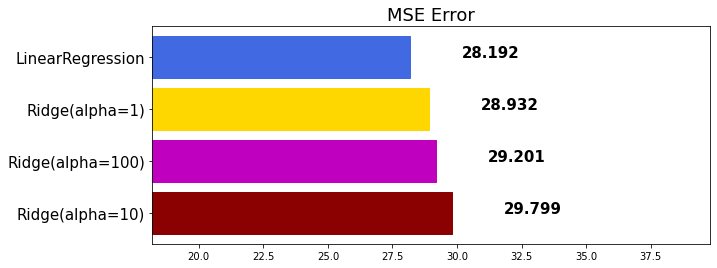

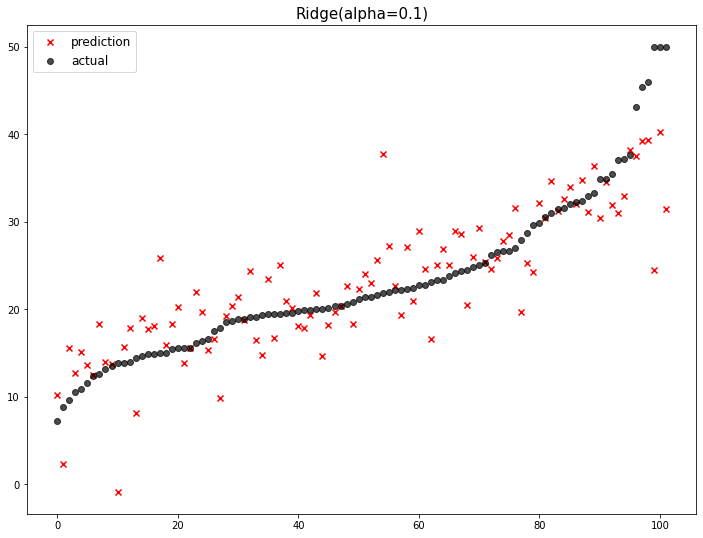

              model        mse
0   Ridge(alpha=10)  29.799160
1  Ridge(alpha=100)  29.201438
2    Ridge(alpha=1)  28.932170
3  Ridge(alpha=0.1)  28.296407
4  LinearRegression  28.192486


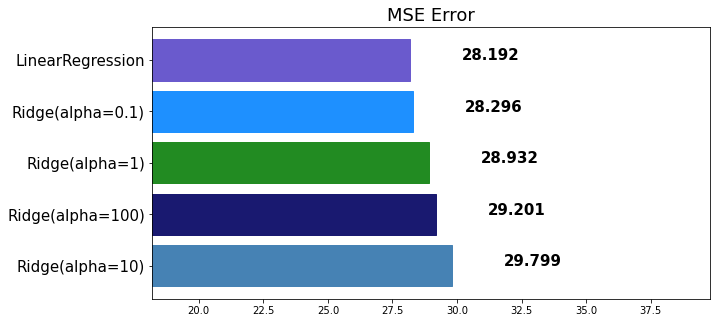

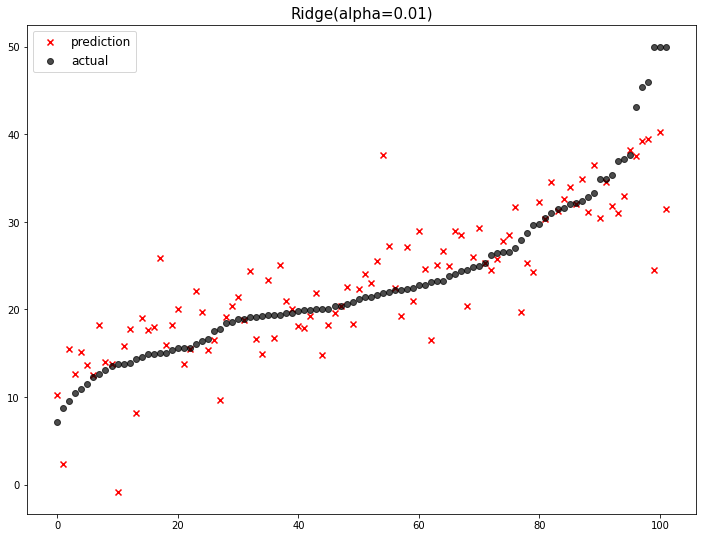

               model        mse
0    Ridge(alpha=10)  29.799160
1   Ridge(alpha=100)  29.201438
2     Ridge(alpha=1)  28.932170
3   Ridge(alpha=0.1)  28.296407
4  Ridge(alpha=0.01)  28.203234
5   LinearRegression  28.192486


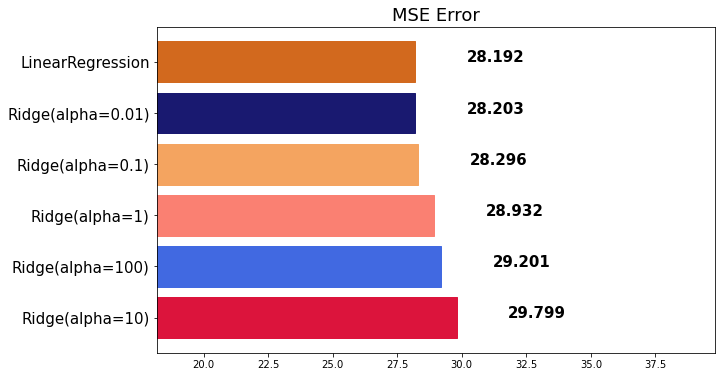

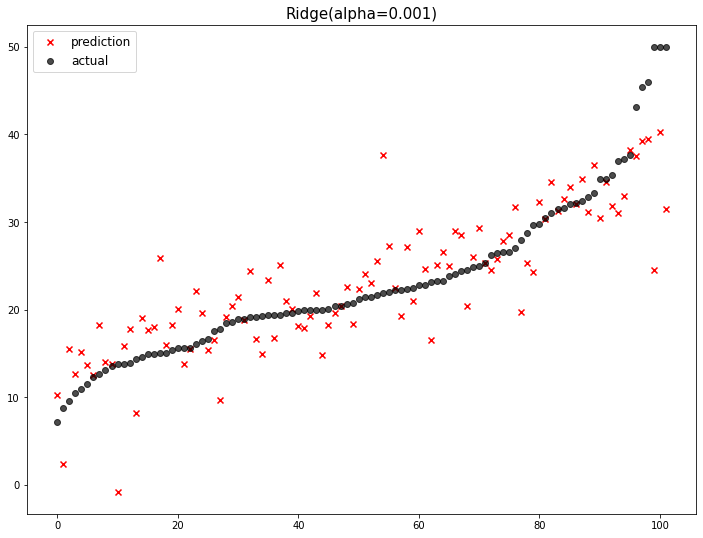

                model        mse
0     Ridge(alpha=10)  29.799160
1    Ridge(alpha=100)  29.201438
2      Ridge(alpha=1)  28.932170
3    Ridge(alpha=0.1)  28.296407
4   Ridge(alpha=0.01)  28.203234
5  Ridge(alpha=0.001)  28.193564
6    LinearRegression  28.192486


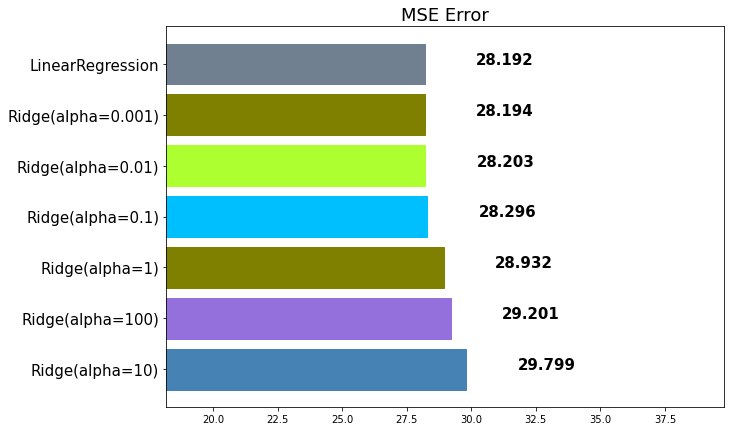

In [89]:
for alpha in alphas:
    #모델 정의
    ridge = Ridge(alpha=alpha)
    # 모델 학습
    ridge.fit(x_train, y_train)
    # 모델 예측
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [92]:
# 데이터셋의 columns에 해당하는 값에 대응되는 파라메터
ridge.coef_

array([-9.87883529e-02,  4.75032654e-02,  6.68986298e-02,  1.26924439e+00,
       -1.54572199e+01,  4.31983129e+00, -9.92279974e-04, -1.36579753e+00,
        2.84489625e-01, -1.27542867e-02, -9.13344007e-01,  7.22611272e-03,
       -5.43802090e-01])

In [91]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [93]:
# weight값을 그래프로 확인한다.
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

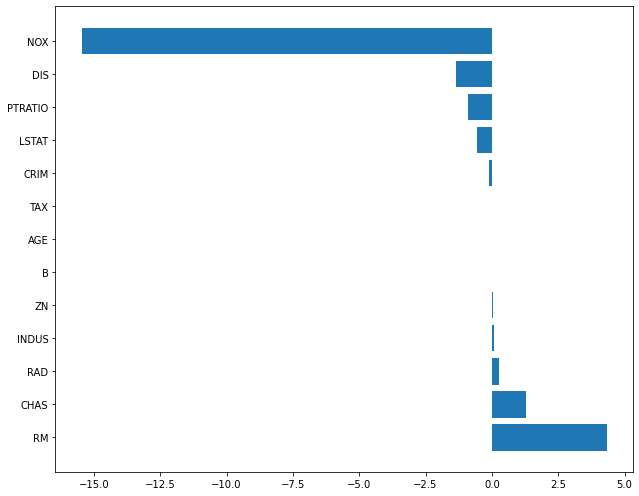

In [94]:
plot_coef(x_train.columns, ridge.coef_)

In [95]:
from sklearn.linear_model import LinearRegression

# model정의
# n_jobs=-1이면 CPU를 모두 사용
model = LinearRegression(n_jobs=-1)

# 모델 학습
model.fit(x_train,y_train)

pred = model.predict(x_test)

pred.shape, y_test.shape

mean_squared_error(pred,y_test)

28.192485758469683

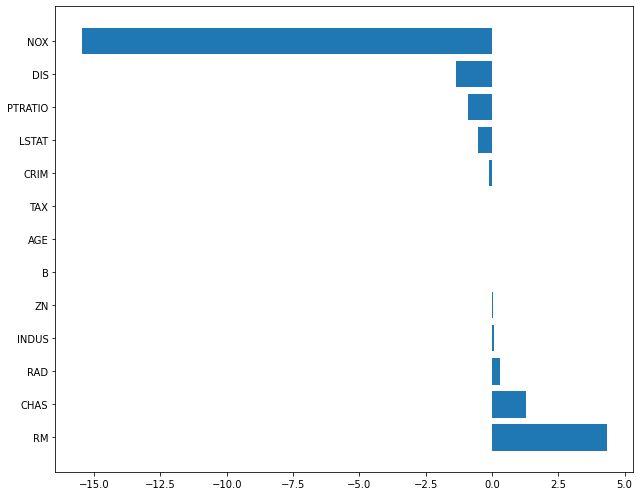

In [96]:
plot_coef(x_train.columns, model.coef_)

### L1(Lasso) 규제

In [98]:
from sklearn.linear_model import Lasso

In [99]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

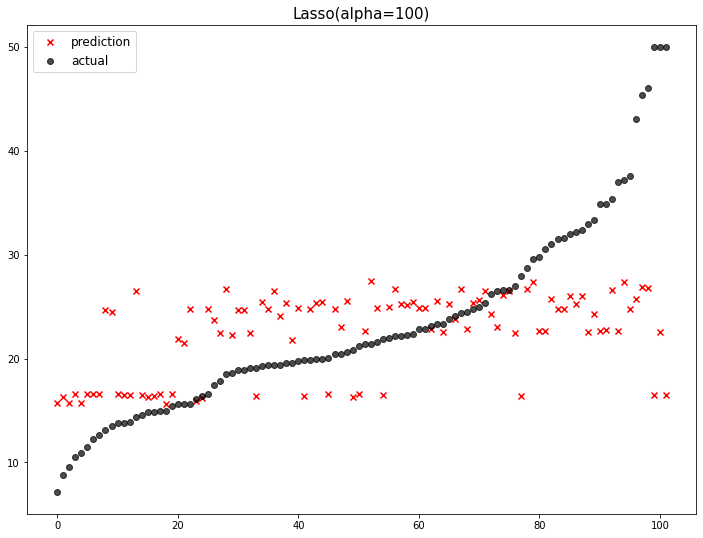

                model        mse
0    Lasso(alpha=100)  71.662293
1     Ridge(alpha=10)  29.799160
2    Ridge(alpha=100)  29.201438
3      Ridge(alpha=1)  28.932170
4    Ridge(alpha=0.1)  28.296407
5   Ridge(alpha=0.01)  28.203234
6  Ridge(alpha=0.001)  28.193564
7    LinearRegression  28.192486


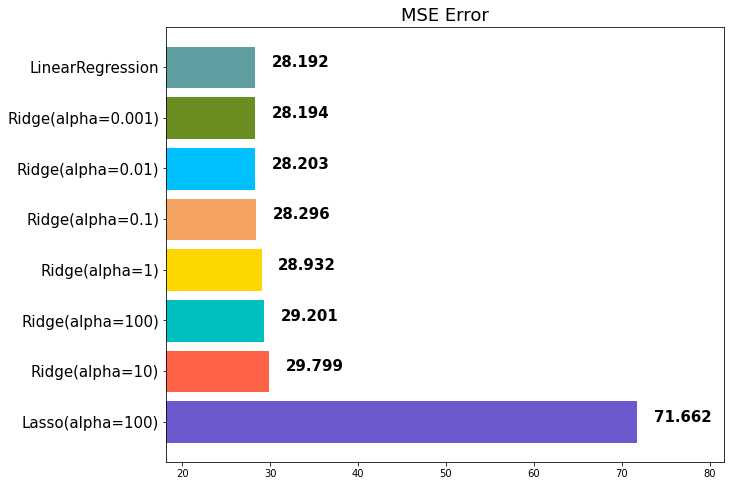

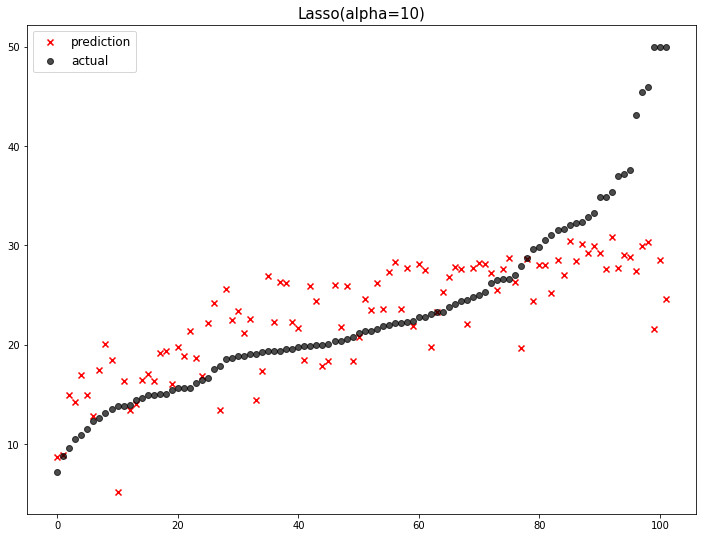

                model        mse
0    Lasso(alpha=100)  71.662293
1     Lasso(alpha=10)  42.977348
2     Ridge(alpha=10)  29.799160
3    Ridge(alpha=100)  29.201438
4      Ridge(alpha=1)  28.932170
5    Ridge(alpha=0.1)  28.296407
6   Ridge(alpha=0.01)  28.203234
7  Ridge(alpha=0.001)  28.193564
8    LinearRegression  28.192486


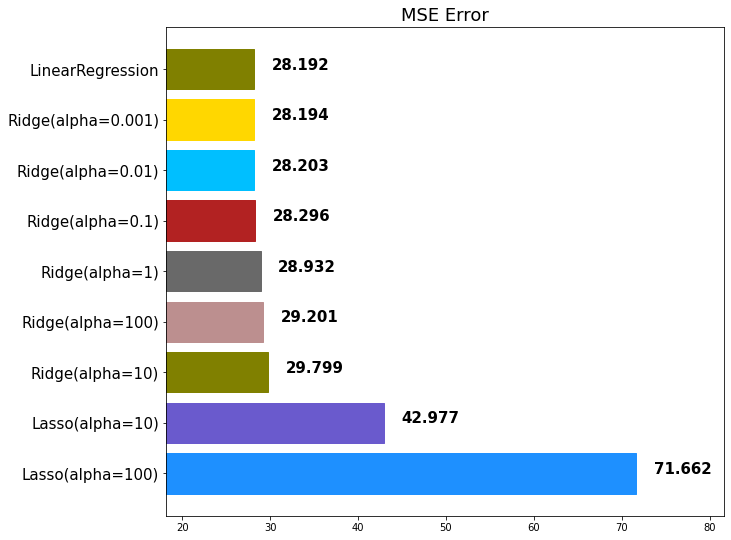

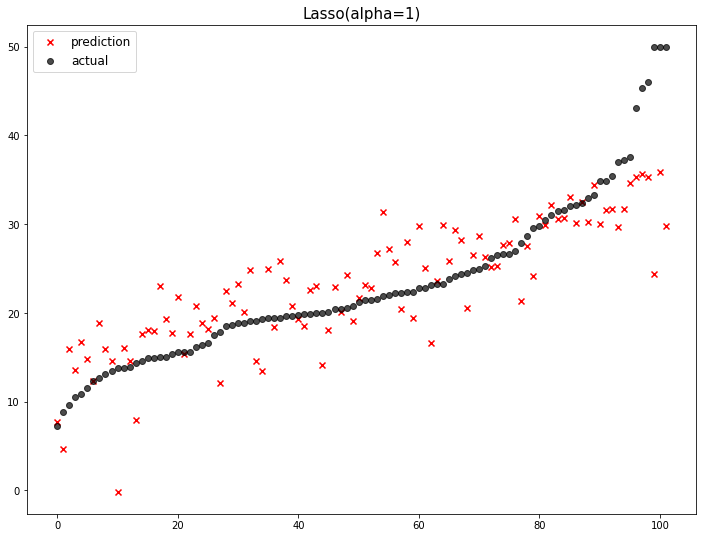

                model        mse
0    Lasso(alpha=100)  71.662293
1     Lasso(alpha=10)  42.977348
2      Lasso(alpha=1)  30.699416
3     Ridge(alpha=10)  29.799160
4    Ridge(alpha=100)  29.201438
5      Ridge(alpha=1)  28.932170
6    Ridge(alpha=0.1)  28.296407
7   Ridge(alpha=0.01)  28.203234
8  Ridge(alpha=0.001)  28.193564
9    LinearRegression  28.192486


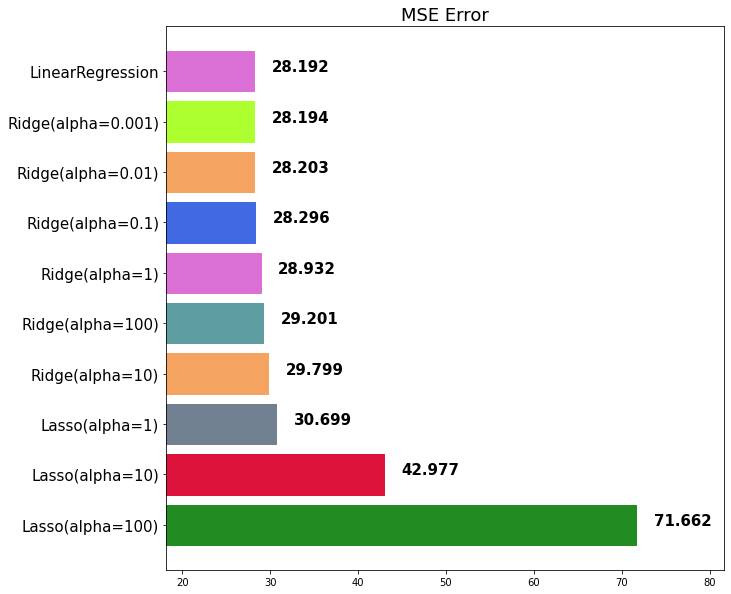

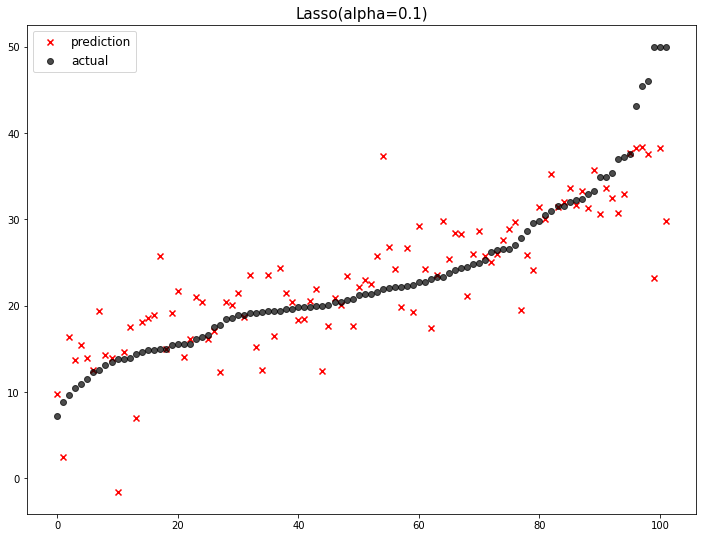

                 model        mse
0     Lasso(alpha=100)  71.662293
1      Lasso(alpha=10)  42.977348
2     Lasso(alpha=0.1)  30.888208
3       Lasso(alpha=1)  30.699416
4      Ridge(alpha=10)  29.799160
5     Ridge(alpha=100)  29.201438
6       Ridge(alpha=1)  28.932170
7     Ridge(alpha=0.1)  28.296407
8    Ridge(alpha=0.01)  28.203234
9   Ridge(alpha=0.001)  28.193564
10    LinearRegression  28.192486


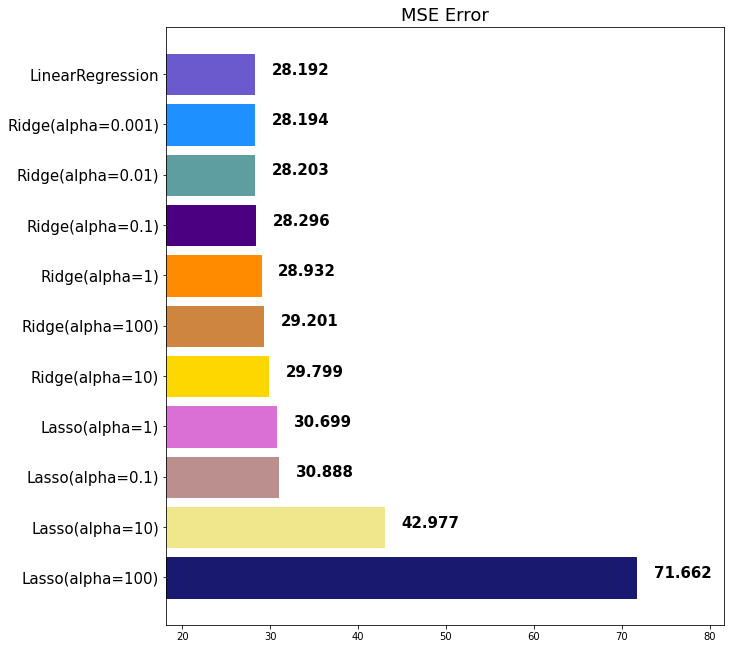

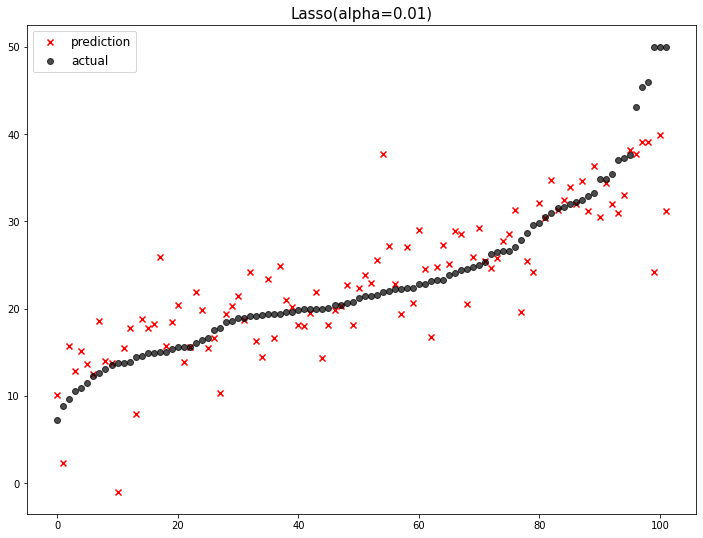

                 model        mse
0     Lasso(alpha=100)  71.662293
1      Lasso(alpha=10)  42.977348
2     Lasso(alpha=0.1)  30.888208
3       Lasso(alpha=1)  30.699416
4      Ridge(alpha=10)  29.799160
5     Ridge(alpha=100)  29.201438
6       Ridge(alpha=1)  28.932170
7    Lasso(alpha=0.01)  28.642732
8     Ridge(alpha=0.1)  28.296407
9    Ridge(alpha=0.01)  28.203234
10  Ridge(alpha=0.001)  28.193564
11    LinearRegression  28.192486


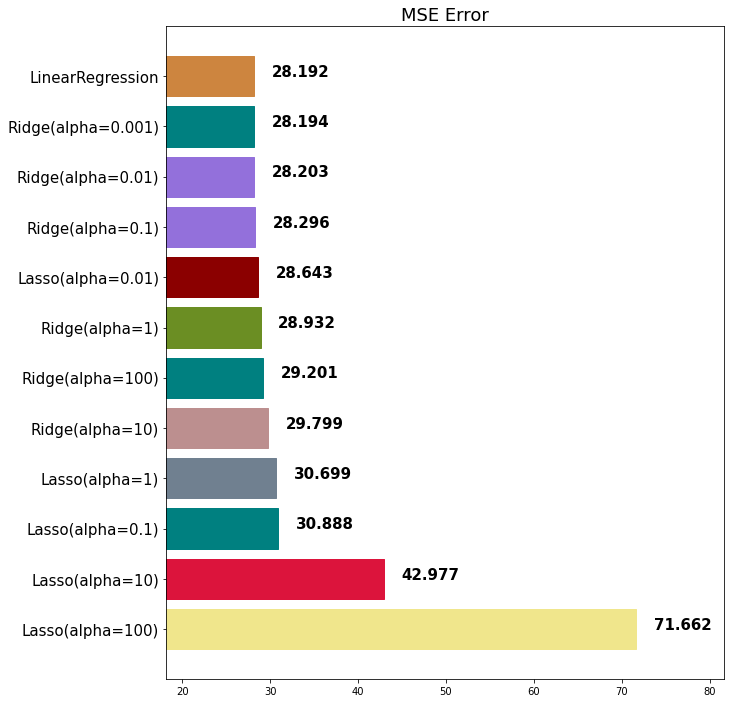

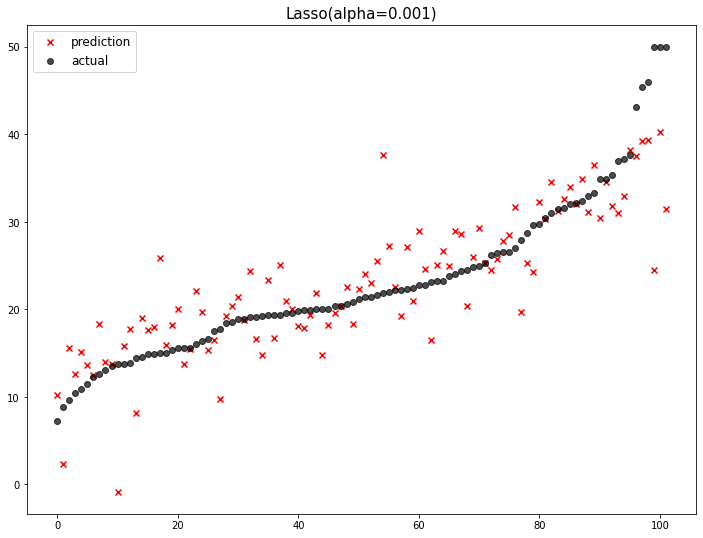

                 model        mse
0     Lasso(alpha=100)  71.662293
1      Lasso(alpha=10)  42.977348
2     Lasso(alpha=0.1)  30.888208
3       Lasso(alpha=1)  30.699416
4      Ridge(alpha=10)  29.799160
5     Ridge(alpha=100)  29.201438
6       Ridge(alpha=1)  28.932170
7    Lasso(alpha=0.01)  28.642732
8     Ridge(alpha=0.1)  28.296407
9   Lasso(alpha=0.001)  28.233601
10   Ridge(alpha=0.01)  28.203234
11  Ridge(alpha=0.001)  28.193564
12    LinearRegression  28.192486


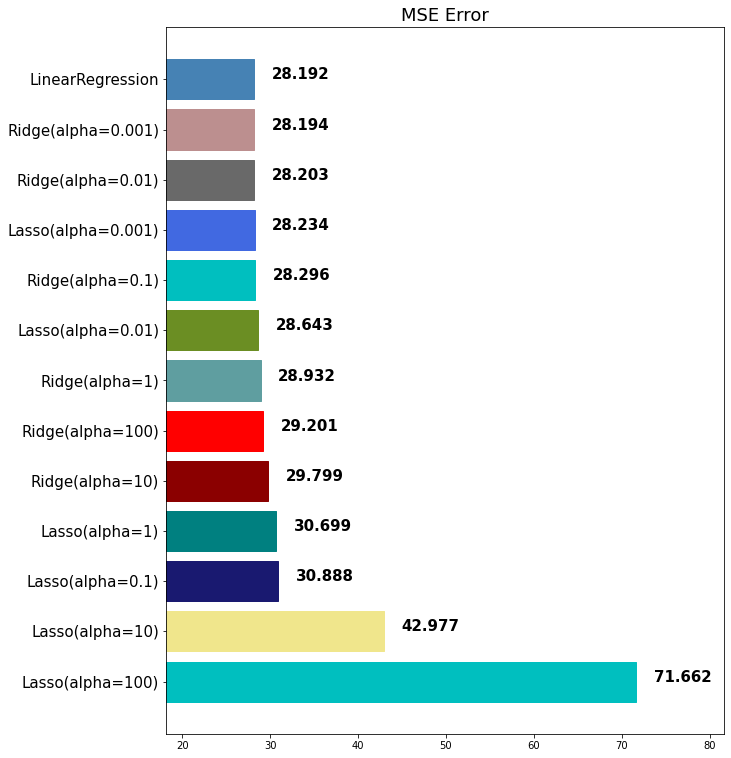

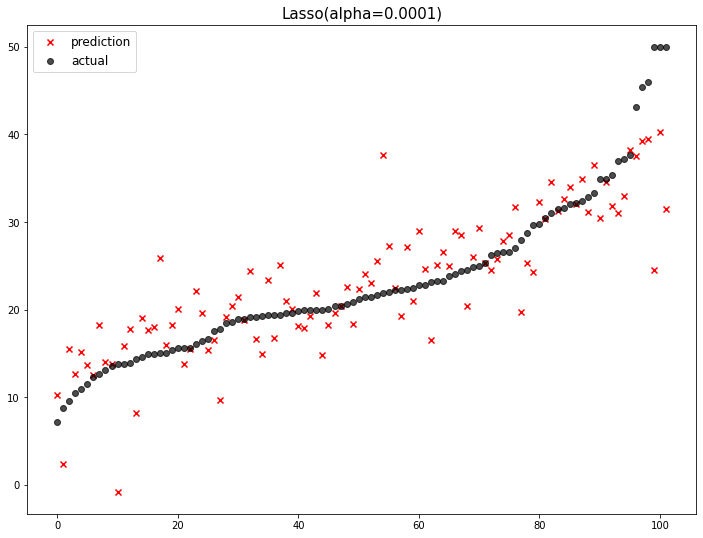

                  model        mse
0      Lasso(alpha=100)  71.662293
1       Lasso(alpha=10)  42.977348
2      Lasso(alpha=0.1)  30.888208
3        Lasso(alpha=1)  30.699416
4       Ridge(alpha=10)  29.799160
5      Ridge(alpha=100)  29.201438
6        Ridge(alpha=1)  28.932170
7     Lasso(alpha=0.01)  28.642732
8      Ridge(alpha=0.1)  28.296407
9    Lasso(alpha=0.001)  28.233601
10    Ridge(alpha=0.01)  28.203234
11  Lasso(alpha=0.0001)  28.196557
12   Ridge(alpha=0.001)  28.193564
13     LinearRegression  28.192486


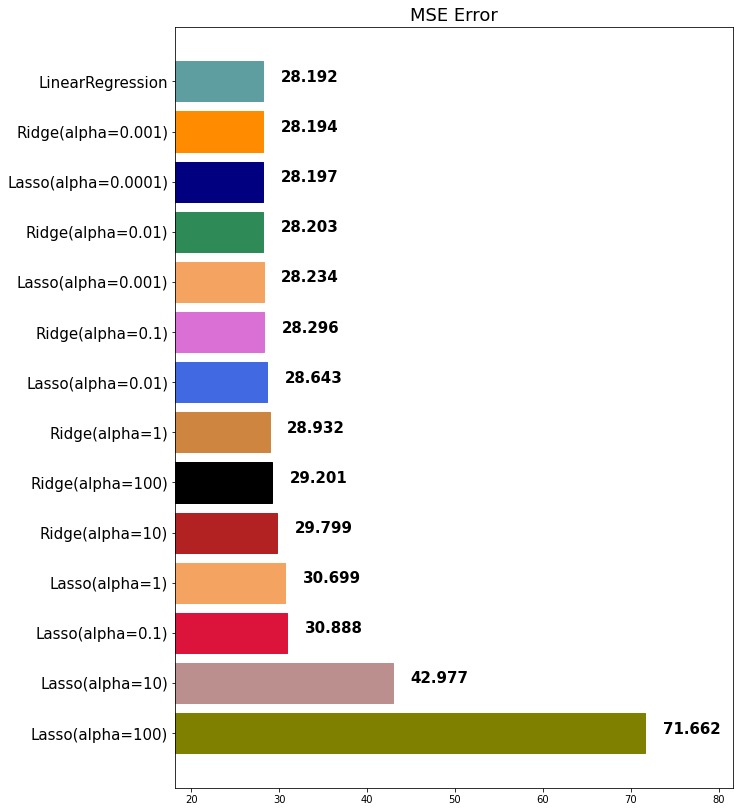

In [100]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

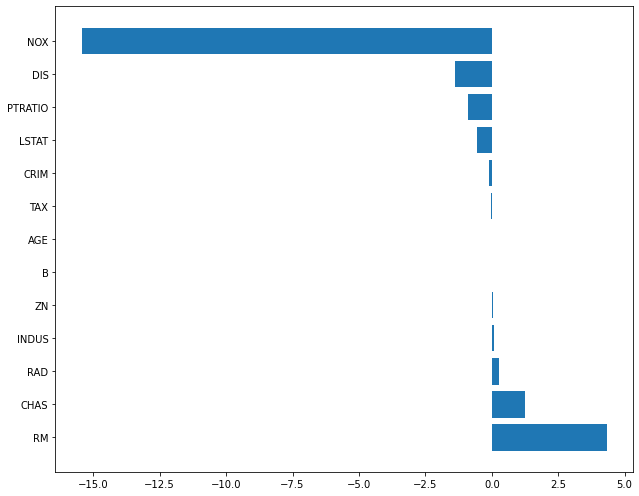

In [101]:
plot_coef(x_train.columns, lasso.coef_)

###  데이터 셋의 전처리를 추가

In [103]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [102]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.556133,11.163366,11.190347,0.056931,0.55548,6.281676,68.974505,3.786204,9.509901,408.445545,18.463861,357.209084,12.825347
std,8.788241,22.973132,6.949621,0.231997,0.11639,0.704875,28.021271,2.138012,8.661394,168.499919,2.148906,91.677481,7.127718
min,0.006320,0.000000,0.460000,0.000000,0.38500,3.561000,6.000000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081960,0.000000,5.130000,0.000000,0.45200,5.887750,45.325000,2.097050,4.000000,279.000000,17.400000,376.092500,7.187500
50%,0.252775,0.000000,9.690000,0.000000,0.53800,6.201500,77.700000,3.100900,5.000000,330.000000,19.050000,391.955000,11.490000
75%,3.681942,12.500000,18.100000,0.000000,0.62400,6.616500,94.100000,5.117025,24.000000,666.000000,20.200000,396.157500,17.127500
max,88.976200,100.000000,27.740000,1.000000,0.87100,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [ ]:
# StandardScaler
# 평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [104]:
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(x_train)

In [107]:
# round 메소드를 사용하면 소수점 2째자리 미만은 반올림
round(pd.DataFrame(std_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.40,-0.49,-1.55,-0.25,-1.47,-3.86,-2.25,-1.23,-0.98,-1.32,-2.73,-3.90,-1.56
25%,-0.40,-0.49,-0.87,-0.25,-0.89,-0.56,-0.85,-0.79,-0.64,-0.77,-0.50,0.21,-0.79
50%,-0.38,-0.49,-0.22,-0.25,-0.15,-0.11,0.31,-0.32,-0.52,-0.47,0.27,0.38,-0.19
75%,0.01,0.06,1.00,-0.25,0.59,0.48,0.90,0.62,1.68,1.53,0.81,0.43,0.60
max,9.73,3.87,2.38,4.07,2.71,3.47,1.11,3.91,1.68,1.80,1.65,0.43,3.39


In [108]:
# MinMaxScaler
# min값과 max값을 0~1사이로 정규화 (숫자의 범위는 파라메터로 변경 가능)

minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [110]:
round(pd.DataFrame(minmax_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.04,0.11,0.39,0.06,0.35,0.53,0.67,0.24,0.37,0.42,0.62,0.90,0.31
std,0.10,0.23,0.25,0.23,0.24,0.14,0.30,0.20,0.38,0.32,0.23,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.14,0.45,0.42,0.08,0.13,0.18,0.51,0.95,0.15
50%,0.00,0.00,0.34,0.00,0.31,0.51,0.76,0.18,0.17,0.27,0.69,0.99,0.28
75%,0.04,0.12,0.65,0.00,0.49,0.59,0.94,0.36,1.00,0.91,0.81,1.00,0.44
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [111]:
# RobustScaler
# 중앙값(median) : [1,2,3,4,5,6,7,8,9,10]
# 중앙값이 0, IQR(InterQuartile Range)이 1이 되도록 변환
# https://wikidocs.net/89704
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [112]:
round(pd.DataFrame(robust_scaled).median(),2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7    -0.0
8     0.0
9     0.0
10    0.0
11   -0.0
12    0.0
dtype: float64

In [113]:
# 파이프라인
from sklearn.pipeline import make_pipeline

In [114]:
# StandardScaler + Ridge모델 정의
ridge_pipeline = make_pipeline(
        StandardScaler(),
        Ridge(alpha=0.001))

In [115]:
# fit + predict
ridge_pred = ridge_pipeline.fit(x_train,y_train).predict(x_test)

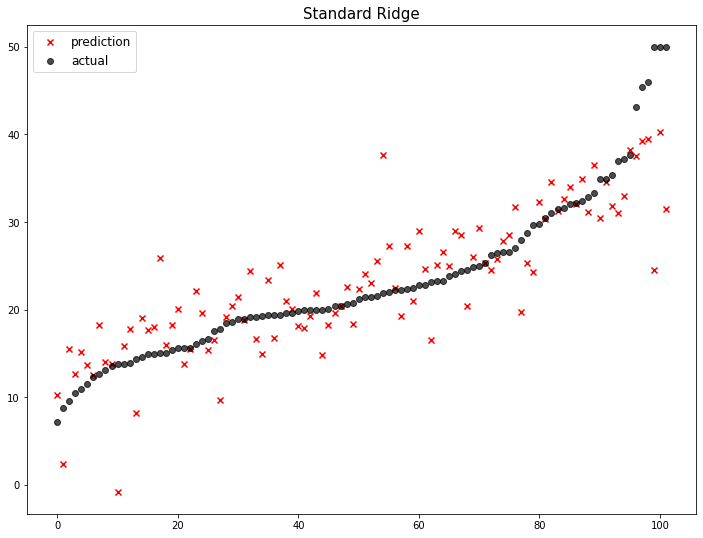

                  model        mse
0      Lasso(alpha=100)  71.662293
1       Lasso(alpha=10)  42.977348
2      Lasso(alpha=0.1)  30.888208
3        Lasso(alpha=1)  30.699416
4       Ridge(alpha=10)  29.799160
5      Ridge(alpha=100)  29.201438
6        Ridge(alpha=1)  28.932170
7     Lasso(alpha=0.01)  28.642732
8      Ridge(alpha=0.1)  28.296407
9    Lasso(alpha=0.001)  28.233601
10    Ridge(alpha=0.01)  28.203234
11  Lasso(alpha=0.0001)  28.196557
12   Ridge(alpha=0.001)  28.193564
13       Standard Ridge  28.192493
14     LinearRegression  28.192486


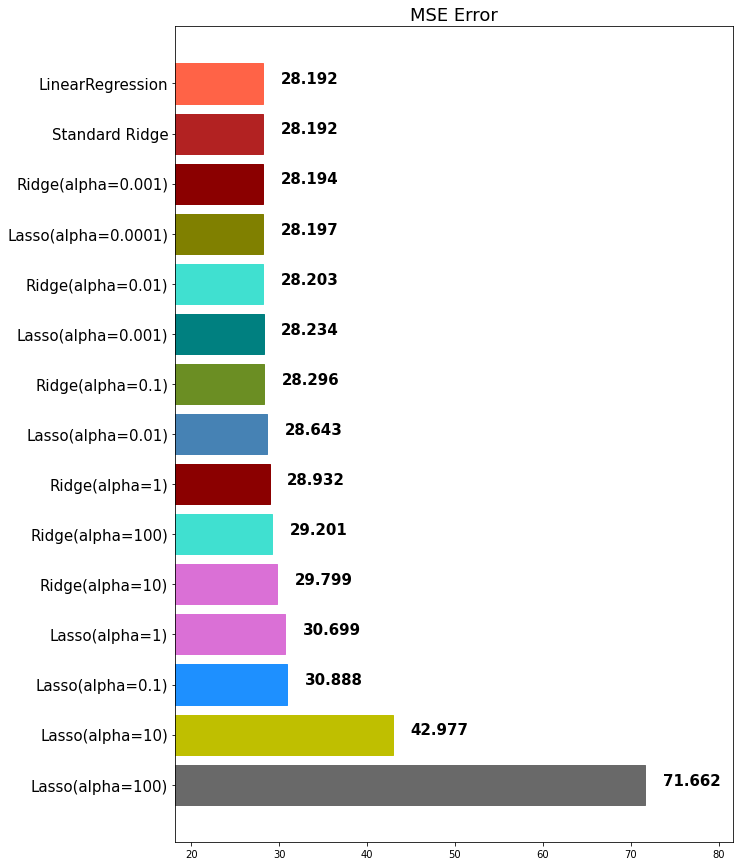

In [116]:
mse_eval('Standard Ridge', ridge_pred, y_test)

### 앙상블(Ensemble)

여러 개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법  
-> 여러 개의 모델을 정의하고, 모델의 예측 값을 평균해서 예측

앙상블 기법의 대표적인 종류
* 보팅(Voting) : 투표를 통해 결과 도출
* 배깅(Bagging) : 샘플 중복 생성해서 결과 도출   
  -> 랜덤 포레스트(기본 모델 decisionTree)
* 부스팅(Boosting) : 이전 오차를 보완하면서 가중치를 업데이트
* 스태킹(Stacking) : 여러 모델을 기반으로 예측된 결과를 통해 meta모델이 다시 한번 예측

In [121]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

# Poly ElasticNet
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

/home/park/miniconda3/envs/ds/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.968759804321053, tolerance: 3.4227182475247537
  positive)


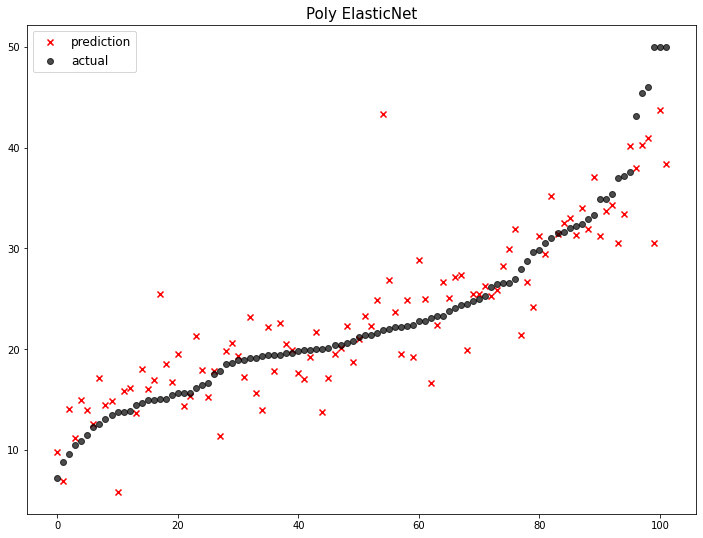

                  model        mse
0      Lasso(alpha=100)  71.662293
1       Lasso(alpha=10)  42.977348
2      Lasso(alpha=0.1)  30.888208
3        Lasso(alpha=1)  30.699416
4       Ridge(alpha=10)  29.799160
5      Ridge(alpha=100)  29.201438
6        Ridge(alpha=1)  28.932170
7     Lasso(alpha=0.01)  28.642732
8      Ridge(alpha=0.1)  28.296407
9    Lasso(alpha=0.001)  28.233601
10    Ridge(alpha=0.01)  28.203234
11  Lasso(alpha=0.0001)  28.196557
12   Ridge(alpha=0.001)  28.193564
13       Standard Ridge  28.192493
14     LinearRegression  28.192486
15      Poly ElasticNet  20.219678


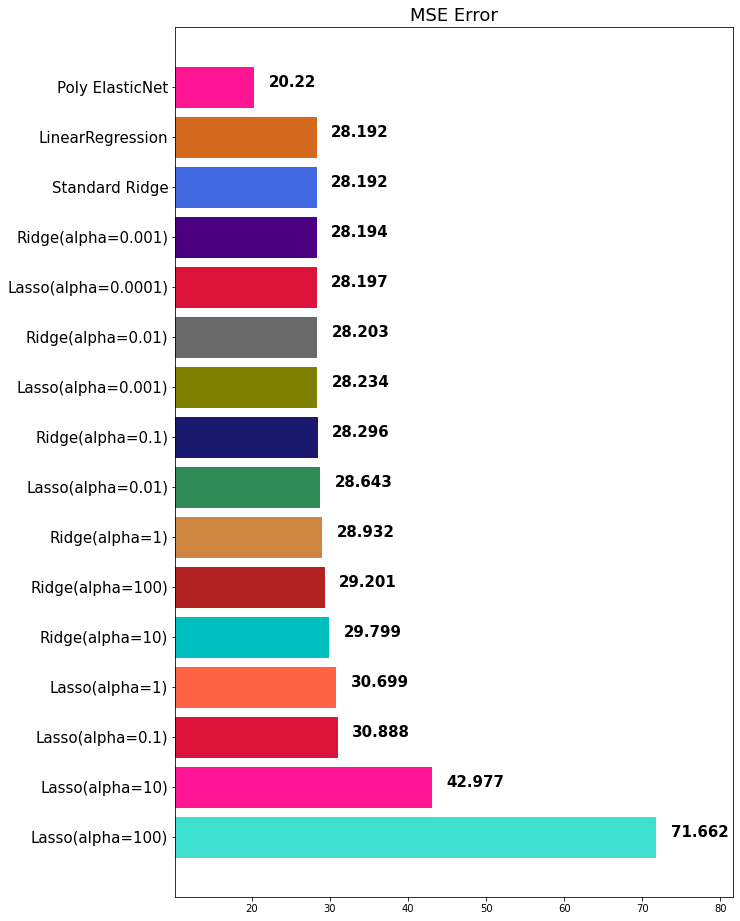

In [123]:
poly_pred = poly_pipeline.fit(x_train,y_train).predict(x_test)
mse_eval("Poly ElasticNet", poly_pred, y_test)